In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [2]:
user_details = pd.read_excel('/content/Assignment.xlsx', sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel('/content/Assignment.xlsx', sheet_name='CookingSessions.csv')
order_details = pd.read_excel('/content/Assignment.xlsx', sheet_name='OrderDetails.csv')

In [3]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [28]:
user_details.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Email Valid', 'Phone Valid',
       'Months Since Registration', 'Age Group'],
      dtype='object')

In [4]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [5]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [6]:
def clean_data():
    # Handling missing values
    user_details.fillna({'Favorite Meal': 'Unknown'}, inplace=True)
    cooking_sessions.fillna({'Session Rating': cooking_sessions['Session Rating'].mean()}, inplace=True)
    order_details.fillna({'Rating': order_details['Rating'].mean()}, inplace=True)

    # Standardizing formats
    user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'], errors='coerce')
    cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'], errors='coerce')
    cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'], errors='coerce')
    order_details['Order Date'] = pd.to_datetime(order_details['Order Date'], errors='coerce')

    # Removing duplicates
    user_details.drop_duplicates(subset='User ID', inplace=True)
    cooking_sessions.drop_duplicates(subset='Session ID', inplace=True)
    order_details.drop_duplicates(subset='Order ID', inplace=True)

    # Email Validation
    user_details['Email Valid'] = user_details['Email'].apply(lambda x: bool(re.match(r'^[\w.%+-]+@[\w.-]+\.[a-zA-Z]{2,}$', str(x))))

    # Phone Number Validation
    user_details['Phone Valid'] = user_details['Phone'].apply(lambda x: bool(re.match(r'^\d{3}-\d{3}-\d{4}$', str(x))))

    # Filter invalid emails and phone numbers (optional)
    user_details.drop(user_details[~user_details['Email Valid']].index, inplace=True)
    user_details.drop(user_details[~user_details['Phone Valid']].index, inplace=True)

    return user_details, cooking_sessions, order_details


In [7]:
# Cleaned datasets
user_details, cooking_sessions, order_details = clean_data()

In [8]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.000000,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.000000,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.285714,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.000000,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.000000,S005


In [9]:
#Data Merging
merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')
final_data = pd.merge(merged_data, order_details, on=['Session ID', 'User ID'], how='inner')

# Save merged data for further analysis
final_data.to_csv('final_data.csv', index=False)

In [10]:
final_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Email Valid,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,True,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,True,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,True,...,40,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,True,...,20,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,True,...,30,4.3,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


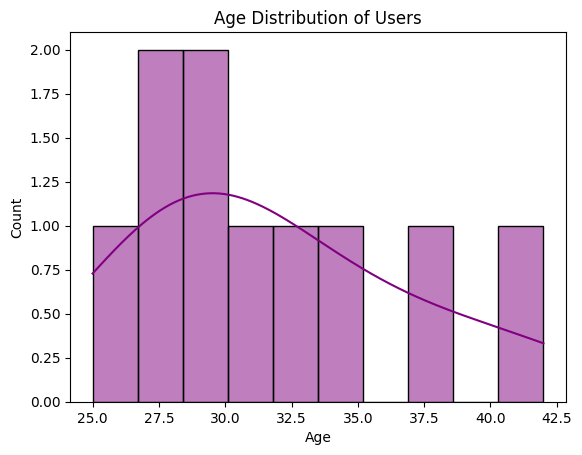

None


In [11]:
# Age Distribution
def plot_age_distribution(user_details):
    sns.histplot(user_details['Age'], bins=10, kde=True, color='purple')
    plt.title('Age Distribution of Users')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

print(plot_age_distribution(user_details))

<ipython-input-12-af4ba7679dac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')


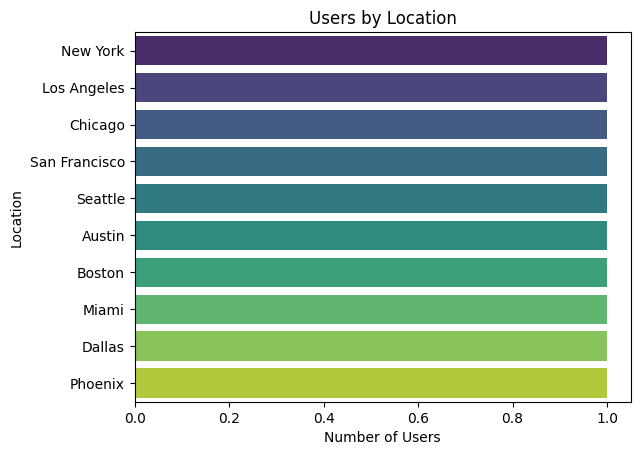

None


In [12]:
# Users by Location
def users_by_location(user_details):
    location_counts = user_details['Location'].value_counts()
    sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
    plt.title('Users by Location')
    plt.xlabel('Number of Users')
    plt.ylabel('Location')
    plt.show()

print(users_by_location(user_details))

<ipython-input-13-e948b98be548>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meal_counts.values, y=meal_counts.index, palette='Blues_d')


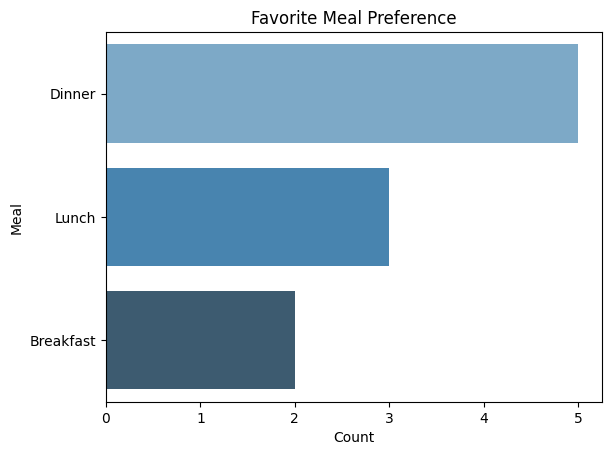

None


In [13]:
# Favorite Meal Preference
def favorite_meal_preference(user_details):
    meal_counts = user_details['Favorite Meal'].value_counts()
    sns.barplot(x=meal_counts.values, y=meal_counts.index, palette='Blues_d')
    plt.title('Favorite Meal Preference')
    plt.xlabel('Count')
    plt.ylabel('Meal')
    plt.show()

print(favorite_meal_preference(user_details))

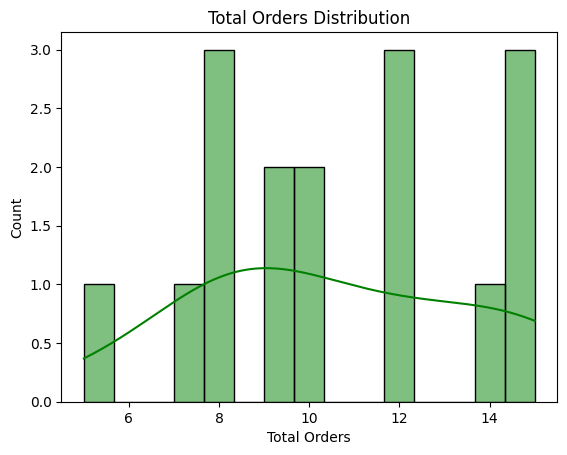

None


In [14]:
# Total Orders Distribution
def total_orders_distribution(final_data):
    sns.histplot(final_data['Total Orders'], bins=15, kde=True, color='green')
    plt.title('Total Orders Distribution')
    plt.xlabel('Total Orders')
    plt.ylabel('Count')
    plt.show()

print(total_orders_distribution(final_data))

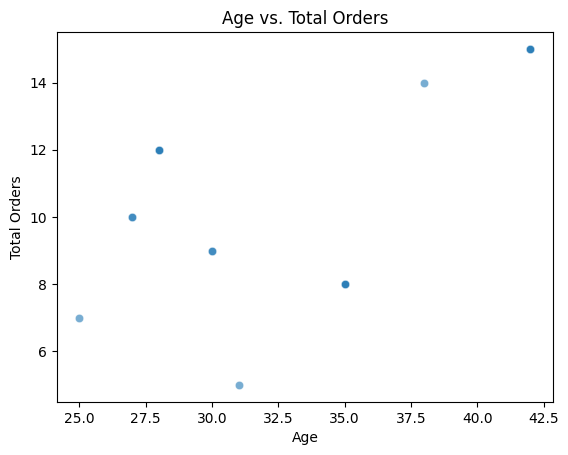

None


In [15]:
# Age vs. Total Orders
def age_vs_total_orders(final_data):
    sns.scatterplot(data=final_data, x='Age', y='Total Orders', alpha=0.6)
    plt.title('Age vs. Total Orders')
    plt.xlabel('Age')
    plt.ylabel('Total Orders')
    plt.show()

print(age_vs_total_orders(final_data))

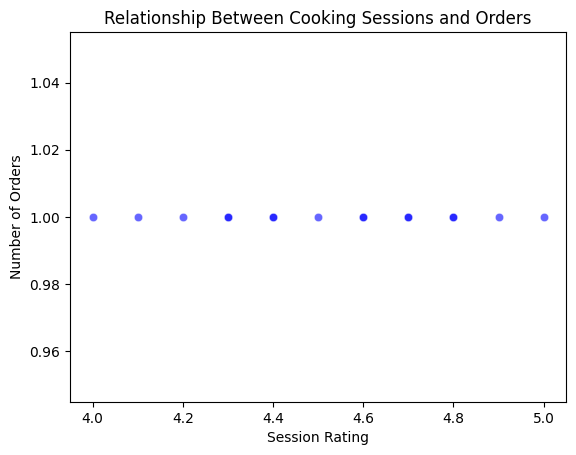

None


In [16]:
def cooking_sessions_vs_orders(final_data):
    session_order_data = final_data.groupby('Session ID').agg({'Order ID': 'count', 'Session Rating': 'mean'}).reset_index()
    sns.scatterplot(data=session_order_data, x='Session Rating', y='Order ID', alpha=0.6, color='blue')
    plt.title('Relationship Between Cooking Sessions and Orders')
    plt.xlabel('Session Rating')
    plt.ylabel('Number of Orders')
    plt.show()

print(cooking_sessions_vs_orders(final_data))

In [17]:
def feature_engineering(user_details, final_data):
    # Months Since Registration
    user_details['Months Since Registration'] = (
        (datetime.now() - user_details['Registration Date']).dt.days // 30
    )
    user_details['Months Since Registration'] = user_details['Months Since Registration'].fillna(0)

    # Order Frequency
    final_data['Order Frequency'] = final_data['Total Orders'] / user_details['Months Since Registration']

    # Age Grouping
    user_details['Age Group'] = pd.cut(
        user_details['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50']
    )

    return user_details, final_data

In [18]:
user_details, final_data = feature_engineering(user_details,final_data)

In [19]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Email Valid,Phone Valid,Months Since Registration,Age Group
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,True,True,23,20-30
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,True,True,22,30-40
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,True,True,21,40-50
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10,True,True,20,20-30
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9,True,True,19,20-30


In [35]:
final_data['Order Frequency'].head()

,Order Frequency
0,0.521739
1,0.545455
2,0.571429
3,0.400000
4,0.421053


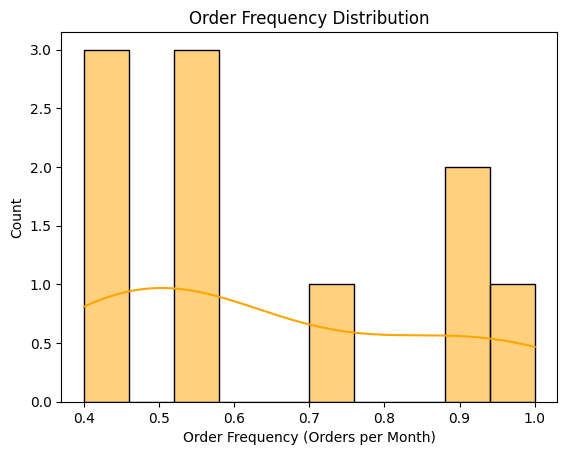

None


In [21]:
# Order Frequency Distribution
def order_frequency_distribution(final_data):
    sns.histplot(final_data['Order Frequency'], bins=10, kde=True, color='orange')
    plt.title('Order Frequency Distribution')
    plt.xlabel('Order Frequency (Orders per Month)')
    plt.ylabel('Count')
    plt.show()

print(order_frequency_distribution(final_data))

<ipython-input-22-ea98bd4eb016>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='cool')


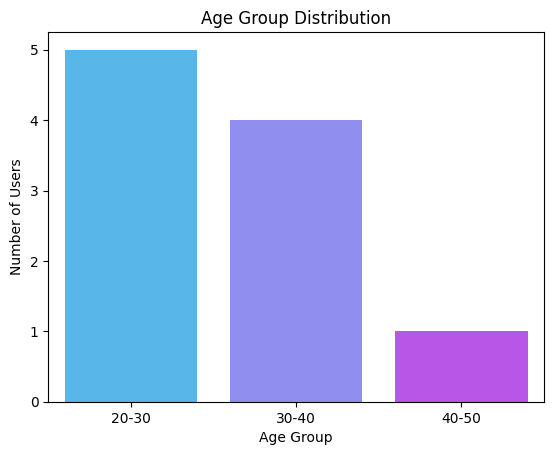

None


In [22]:
# Age Group Distribution
def age_group_distribution(user_details):
    age_group_counts = user_details['Age Group'].value_counts()
    sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='cool')
    plt.title('Age Group Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Users')
    plt.show()

print(age_group_distribution(user_details))

<ipython-input-23-f198f75dae82>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='magma')


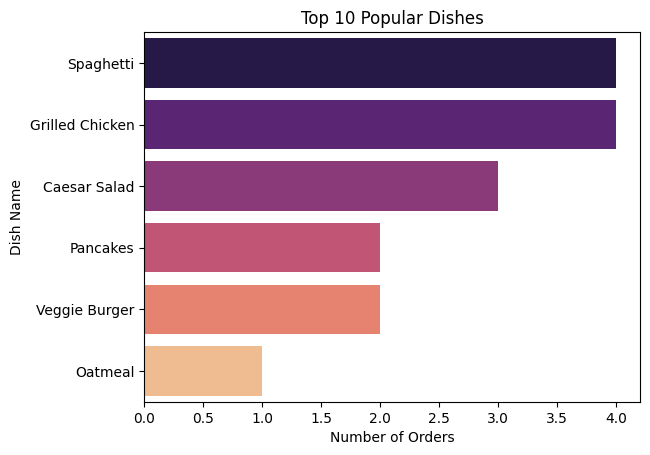

None


In [23]:
# Popular Dishes Identification
def popular_dishes(order_details):
    popular_dishes = order_details['Dish Name'].value_counts().head(10)
    sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='magma')
    plt.title('Top 10 Popular Dishes')
    plt.xlabel('Number of Orders')
    plt.ylabel('Dish Name')
    plt.show()

print(popular_dishes(order_details))

In [24]:
user_details.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Email Valid', 'Phone Valid',
       'Months Since Registration', 'Age Group'],
      dtype='object')

<ipython-input-25-80fe2b69f365>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_order_data = final_data.groupby('Age Group').agg({'Total Orders': 'mean'}).reset_index()
<ipython-input-25-80fe2b69f365>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_order_data, x='Age Group', y='Total Orders', palette='husl')


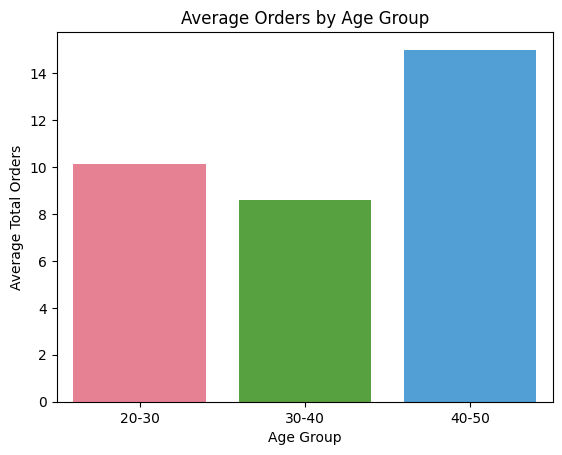

None


In [25]:
def demographic_analysis(user_details, final_data):
    # Ensure Age Group exists in both datasets
    if 'Age Group' not in user_details.columns:
        user_details['Age Group'] = pd.cut(
            user_details['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50']
        )

    # Merge Age Group into final_data if not already present
    if 'Age Group' not in final_data.columns:
        final_data = pd.merge(final_data, user_details[['User ID', 'Age Group']], on='User ID', how='left')

    # Group by Age Group and calculate average total orders
    age_order_data = final_data.groupby('Age Group').agg({'Total Orders': 'mean'}).reset_index()

    # Plot the results
    sns.barplot(data=age_order_data, x='Age Group', y='Total Orders', palette='husl')
    plt.title('Average Orders by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Average Total Orders')
    plt.show()

print(demographic_analysis(user_details, final_data))

In [26]:
final_data.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Email Valid', 'Phone Valid',
       'Session ID', 'Dish Name_x', 'Meal Type_x', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'Order ID',
       'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating', 'Order Frequency'],
      dtype='object')